In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria objeto com o caminho da pasta do Projeto
from pathlib import Path
#pasta_projeto = Path('/content/drive/MyDrive/AGU_Notebooks/Labs R2D2/')
pasta_projeto = Path(Path.cwd())

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

!pip install pyarrow
!pip install fastparquet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luciana.angrisano\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dados = pd.read_parquet(pasta_projeto /'dados_desbalanceados.parquet')

In [4]:
print(dados.shape)
dados['coordenacao'].value_counts()

(33111, 6)


coordenacao
COREJEF     13221
CORESP      11999
CORESE       3759
CORESA       1951
COREM        1111
COREPAM       613
CORAT         367
CORETRAB       55
COREPRO        35
Name: count, dtype: int64

In [5]:
dados

,cnj,orgao,classe,tipo,coordenacao,peticao_processada
index,,,,,,
0,10437601020204013300,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,COREJEF,vara juizados especiais federais secao judicia...
1,10028658120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
2,10028363120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
3,10028622920234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
4,10030355320234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
...,...,...,...,...,...,...
35645,10619787220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,inicial anexa
35647,10599157420234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,1 4 vara secao judiciaria distrito distribuica...
35648,10638251220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,vara subsecao judiciaria distrito ref cumprime...


In [6]:
# define variaveis independentes e variável dependente(TARGET)
X = dados[['peticao_processada','tipo','classe','orgao']]
y = dados['coordenacao']

In [7]:
# Transformação das variáveis independentes categórica para numérica

X_train_dum = pd.get_dummies(X[['tipo','classe','orgao']])
X_train_dum.shape


(33111, 1242)

In [8]:
X_train_dum = X_train_dum.astype(int)


In [9]:
dados.dtypes

cnj                   object
orgao                 object
classe                object
tipo                  object
coordenacao           object
peticao_processada    object
dtype: object

In [10]:
# mostra o dataframe da variável texto com as variáveis categóricas já tratadas
X = pd.concat([X['peticao_processada'], X_train_dum], axis=1)
X.head()

,peticao_processada,tipo_1/3 DE FÉRIAS,tipo_ABATIMENTO PROPORCIONAL DO PREÇO,tipo_ABONO DA LEI 8.178/91,tipo_ABONO DE PERMANÊNCIA,tipo_ABONO DE PERMANÊNCIA EM SERVIÇO (ART. 87),tipo_ABONO PECUNIÁRIO (ART. 78 LEI 8.112/1990),tipo_ACESSIBILIDADE,tipo_ACESSO SEM CONCLUSÃO DO ENSINO MÉDIO,tipo_ACESSÃO,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
0,vara juizados especiais federais secao judicia...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,juizo 1 vara secao judiciaria estado goias dis...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,juizo 1 vara secao judiciaria estado goias dis...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,juizo 1 vara secao judiciaria estado goias dis...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,juizo 1 vara secao judiciaria estado goias dis...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [12]:
# Tratamento dos dados de treino textual 
##posso tirar stopwords aqui
tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), min_df=3, max_df=0.70, max_features=1000)

# Aprende vocabulário e idf do conjunto de treinamento
tfidf.fit(X_train['peticao_processada'])

# Transforma documentos em matriz termo-documento
X_train_tfidf = tfidf.transform(X_train['peticao_processada'])
X_test_tfidf = tfidf.transform(X_test['peticao_processada'])

In [13]:
# tratamento do test
# após a transformação do texto usamos o todense para armazenar valores ausentes na série (quando nao encontrou a palavra na petição retornou "naN")
X_test_tfidf = pd.DataFrame(X_test_tfidf.todense())
X_test_tfidf.index = X_test.index

In [14]:

# função concat para retirar a coluna de texto da petição , axis = 1 concatena colunas axis = 0 concatena linhas
X_test = pd.concat([X_test_tfidf, X_test.drop(columns='peticao_processada')], axis=1)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
14203,0.000000,0.004838,0.008650,0.000000,0.0,0.000000,0.004143,0.005239,0.023334,0.00766,...,0,0,0,0,0,0,0,0,0,0
10262,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
28191,0.000000,0.000000,0.000000,0.000000,0.0,0.055021,0.017995,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
18905,0.018624,0.000000,0.000000,0.000000,0.0,0.000000,0.023784,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
15163,0.000000,0.025450,0.011376,0.038156,0.0,0.016659,0.010897,0.000000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# tratamento dos dados do treino
X_train_tfidf = pd.DataFrame(X_train_tfidf.todense())
X_train_tfidf.index = X_train.index

In [16]:
# função concat para juntar tfidf e dum, axis = 1 concatena colunas axis = 0 concatena linhas
X_train = pd.concat([X_train_tfidf, X_train.drop(columns='peticao_processada')], axis=1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0.00461,0.002946,0.000000,0.005890,0.000000,0.007715,0.005046,0.003191,0.0,0.004665,...,0,0,0,0,0,0,0,0,0,0
11935,0.00000,0.029210,0.000000,0.014598,0.017957,0.057360,0.012507,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
32040,0.00000,0.025057,0.011200,0.025044,0.000000,0.000000,0.000000,0.040700,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
26681,0.00000,0.025181,0.011256,0.025168,0.000000,0.000000,0.000000,0.040902,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
14616,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Converte as classes de treinamento para números inteiros
y_train_encoded = label_encoder.fit_transform(y_train)

In [18]:
############################## a partir daqui um novo notebook.... preciso entender cmo salvar (X_train, y_train) e (X_test, y_test)

In [19]:
!pip install --upgrade pandas xgboost

In [20]:
# importação das bibliotecas necessárias para treino e teste do modelo e métricas
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score





In [21]:
# importa o modelo XGBOOST
from xgboost import XGBClassifier

# instancia o modelo
model = XGBClassifier()

# treina e testa o modelo
model.fit(X_train, y_train_encoded)

y_test_encoded = label_encoder.transform(y_test)

# Avalia o modelo com model score
accuracy = model.score(X_test, y_test_encoded)
print(f"Acurácia do modelo .score: {accuracy}")

#avalia o modelo com accurancy_score
y_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test_encoded, y_pred)
print(f"Acurácia do modelo accurancy_score: {accuracy_score}")

Acurácia do modelo .score: 0.9770496753736977
Acurácia do modelo accurancy_score: 0.9770496753736977


In [22]:
#importou a biblioteca para medir a acurácia balanceada
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model.predict(X_test)))

0.8497755678795675


In [23]:
# importa a biblioteca para visualização das métricas
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model.predict(X_test)))
y_pred_encoded = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89        73
           1       1.00      1.00      1.00      2645
           2       0.91      0.92      0.92       222
           3       0.93      0.80      0.86       123
           4       1.00      0.43      0.60         7
           5       0.98      0.97      0.98       390
           6       0.96      0.97      0.96       752
           7       0.97      0.98      0.98      2400
           8       0.89      0.73      0.80        11

    accuracy                           0.98      6623
   macro avg       0.95      0.85      0.89      6623
weighted avg       0.98      0.98      0.98      6623



In [24]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.93      0.86      0.89        73
     COREJEF       1.00      1.00      1.00      2645
       COREM       0.91      0.92      0.92       222
     COREPAM       0.93      0.80      0.86       123
     COREPRO       1.00      0.43      0.60         7
      CORESA       0.98      0.97      0.98       390
      CORESE       0.96      0.97      0.96       752
      CORESP       0.97      0.98      0.98      2400
    CORETRAB       0.89      0.73      0.80        11

    accuracy                           0.98      6623
   macro avg       0.95      0.85      0.89      6623
weighted avg       0.98      0.98      0.98      6623



In [25]:
!pip install seaborn
!pip install matplotlib

<Figure size 1000x800 with 0 Axes>

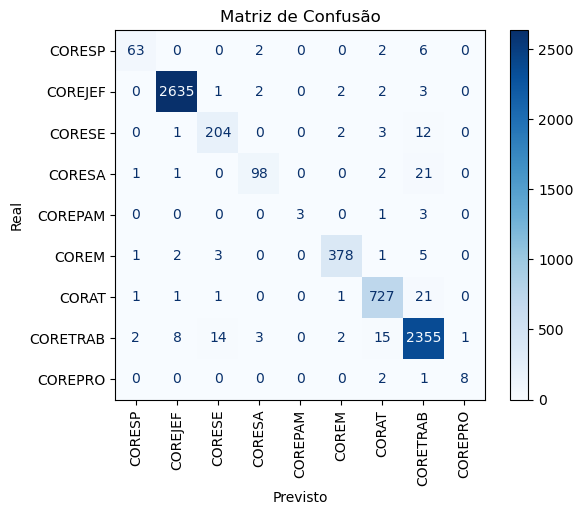

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()


In [27]:
!pip install -U imbalanced-learn


In [28]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PARNAÍBA-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE PAULO AFONSO-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE REDENÇÃO-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE RIO VERDE-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE SÃO RAIMUNDO NONATO-PI,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TABATINGA-AM,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TEIXEIRA DE FREITAS-BA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE TUCURUÍ-PA,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE URUAÇU-GO,orgao_VARA FEDERAL CÍVEL E CRIMINAL DA SSJ DE VILHENA-RO
index,,,,,,,,,,,,,,,,,,,,,
13054,0.00461,0.002946,0.000000,0.005890,0.000000,0.007715,0.005046,0.003191,0.0,0.004665,...,0,0,0,0,0,0,0,0,0,0
11935,0.00000,0.029210,0.000000,0.014598,0.017957,0.057360,0.012507,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
32040,0.00000,0.025057,0.011200,0.025044,0.000000,0.000000,0.000000,0.040700,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
26681,0.00000,0.025181,0.011256,0.025168,0.000000,0.000000,0.000000,0.040902,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
14616,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0.00000,0.000000,0.000000,0.014219,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2964,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064537,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
14426,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014701,0.018590,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train.columns = X_train.columns.astype(str)

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

In [33]:
from sklearn.metrics import accuracy_score

# instancia o modelo balanceado
model_balanced = XGBClassifier()

# treina e testa o modelo balanceado
model_balanced.fit(X_train_resampled, y_train_resampled)

# Avalia o modelo balanceado
accuracy_balanced = model_balanced.score(X_test, y_test_encoded)
print(f"Acurácia do modelo: {accuracy_balanced}")

# avalia o modelo com accuracy_score
y_pred = model_balanced.predict(X_test)
accuracy_score_value = accuracy_score(y_test_encoded, y_pred)
print(f"Acurácia do modelo accuracy_score: {accuracy_score_value}")


Acurácia do modelo: 0.9787105541295485
Acurácia do modelo accuracy_score: 0.9787105541295485


In [34]:
#medir a acurácia balanceada

print(balanced_accuracy_score(y_test_encoded, model_balanced.predict(X_test)))

0.8706322344775247


In [35]:

print(classification_report(y_test_encoded, model_balanced.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        73
           1       1.00      0.99      1.00      2645
           2       0.90      0.95      0.93       222
           3       0.85      0.90      0.88       123
           4       1.00      0.57      0.73         7
           5       0.98      0.98      0.98       390
           6       0.96      0.97      0.97       752
           7       0.98      0.98      0.98      2400
           8       0.78      0.64      0.70        11

    accuracy                           0.98      6623
   macro avg       0.92      0.87      0.89      6623
weighted avg       0.98      0.98      0.98      6623



In [36]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_original = label_encoder.inverse_transform(model_balanced.predict(X_test))

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.87      0.85      0.86        73
     COREJEF       1.00      0.99      1.00      2645
       COREM       0.90      0.95      0.93       222
     COREPAM       0.85      0.90      0.88       123
     COREPRO       1.00      0.57      0.73         7
      CORESA       0.98      0.98      0.98       390
      CORESE       0.96      0.97      0.97       752
      CORESP       0.98      0.98      0.98      2400
    CORETRAB       0.78      0.64      0.70        11

    accuracy                           0.98      6623
   macro avg       0.92      0.87      0.89      6623
weighted avg       0.98      0.98      0.98      6623



<Figure size 1000x800 with 0 Axes>

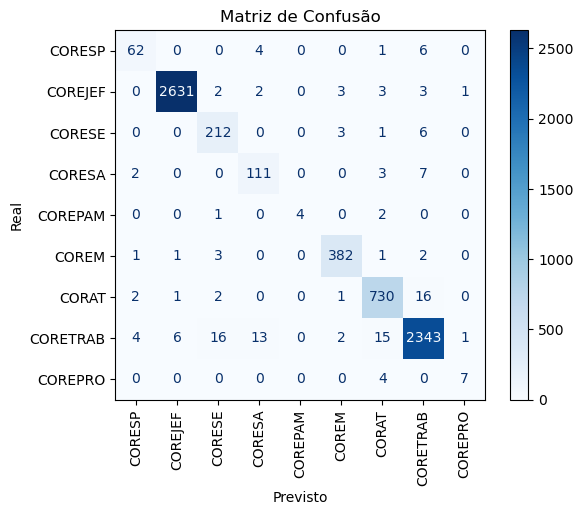

In [39]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model_balanced.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_balanced,X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()


